In [ ]:
pip install numpy opencv-python pytesseract

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
pip install pillow

In [ ]:
pip install pytesseract opencv-python-headless

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


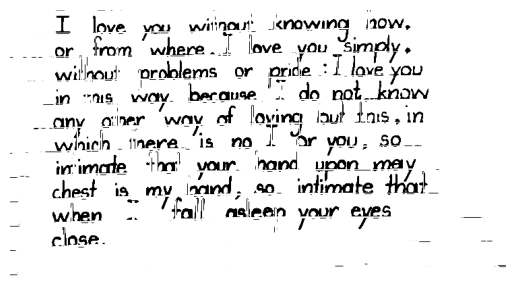

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_background_lines_and_sharpen(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)


    _, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


    horizontal_kernel = np.ones((1, 30), np.uint8)
    horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel)

    vertical_kernel = np.ones((30, 1), np.uint8)
    vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel)


    lines = cv2.bitwise_or(horizontal_lines, vertical_lines)


    lines_removed = cv2.bitwise_and(binary_img, cv2.bitwise_not(lines))


    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_img = cv2.filter2D(lines_removed, -1, sharpen_kernel)


    enhanced_contrast = cv2.convertScaleAbs(sharpened_img, alpha=1.5, beta=0)


    final_img = cv2.bitwise_not(enhanced_contrast)


    denoised_img = cv2.fastNlMeansDenoising(final_img, None, 30, 7, 21)


    plt.imshow(denoised_img, cmap='gray')
    plt.axis('off')
    plt.show()


image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'  # Replace with your image path
remove_background_lines_and_sharpen(image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


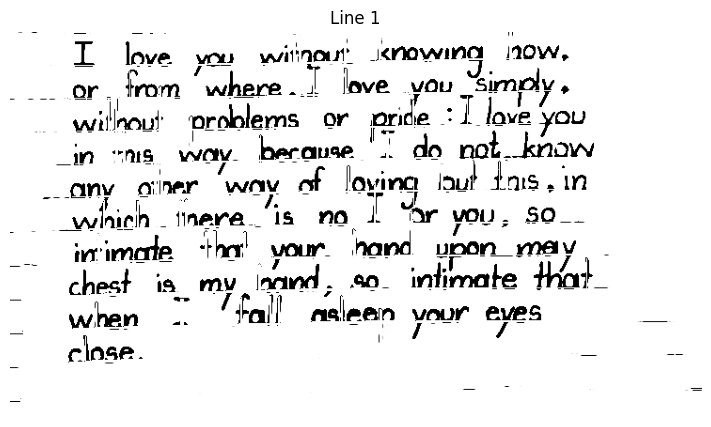

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/drive')


image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'

def remove_background_lines_and_sharpen(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Image not found or unable to load. Please check the file path.")
        return None


    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)


    _, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    horizontal_kernel = np.ones((1, 30), np.uint8)
    horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel)


    vertical_kernel = np.ones((30, 1), np.uint8)
    vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel)


    lines = cv2.bitwise_or(horizontal_lines, vertical_lines)


    lines_removed = cv2.bitwise_and(binary_img, cv2.bitwise_not(lines))

    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_img = cv2.filter2D(lines_removed, -1, sharpen_kernel)


    enhanced_contrast = cv2.convertScaleAbs(sharpened_img, alpha=1.5, beta=0)

    final_img = cv2.bitwise_not(enhanced_contrast)


    denoised_img = cv2.fastNlMeansDenoising(final_img, None, 30, 7, 21)

    return denoised_img

def remove_background_lines_and_segment(processed_img):
    if processed_img is None:
        print("Error: Processed image is None. Unable to segment lines.")
        return []

    contours, _ = cv2.findContours(processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    segmented_lines = []
    for contour in contours:

        x, y, w, h = cv2.boundingRect(contour)


        if h > 15:

            line_img = processed_img[y:y+h, x:x+w]
            segmented_lines.append(line_img)

    return segmented_lines

def display_segmented_lines(segmented_lines):

    plt.figure(figsize=(10, 5))
    for i, line_img in enumerate(segmented_lines):
        plt.subplot(1, len(segmented_lines), i+1)
        plt.imshow(line_img, cmap='gray')
        plt.axis('off')
        plt.title(f'Line {i+1}')
    plt.show()


processed_img = remove_background_lines_and_sharpen(image_path)


segmented_lines = remove_background_lines_and_segment(processed_img)


display_segmented_lines(segmented_lines)



Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_1.png


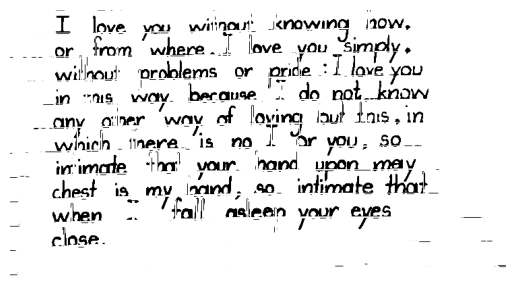

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def remove_background_lines_and_sharpen(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    _, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


    horizontal_kernel = np.ones((1, 30), np.uint8)
    horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel)


    vertical_kernel = np.ones((30, 1), np.uint8)
    vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel)


    lines = cv2.bitwise_or(horizontal_lines, vertical_lines)


    lines_removed = cv2.bitwise_and(binary_img, cv2.bitwise_not(lines))


    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_img = cv2.filter2D(lines_removed, -1, sharpen_kernel)


    enhanced_contrast = cv2.convertScaleAbs(sharpened_img, alpha=1.5, beta=0)


    final_img = cv2.bitwise_not(enhanced_contrast)

    denoised_img = cv2.fastNlMeansDenoising(final_img, None, 30, 7, 21)

    return denoised_img

def remove_background_lines_and_segment(processed_img, save_folder):

    os.makedirs(save_folder, exist_ok=True)


    contours, _ = cv2.findContours(processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])


    segmented_lines = []
    for contour in contours:

        x, y, w, h = cv2.boundingRect(contour)


        if h > 15:

            line_img = processed_img[y:y+h, x:x+w]
            segmented_lines.append(line_img)


    for i, line_img in enumerate(segmented_lines):
        line_image_path = os.path.join(save_folder, f"line_{i+1}.png")
        cv2.imwrite(line_image_path, line_img)
        print(f"Saved: {line_image_path}")


    for i, line_img in enumerate(segmented_lines):
        plt.subplot(1, len(segmented_lines), i+1)
        plt.imshow(line_img, cmap='gray')
        plt.axis('off')
    plt.show()


image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'  # Replace with your image path
save_folder = '/content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines'  # Define the save path


processed_img = remove_background_lines_and_sharpen(image_path)


remove_background_lines_and_segment(processed_img, save_folder)

Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_1.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_2.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_3.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_4.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_5.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_6.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_7.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_8.png


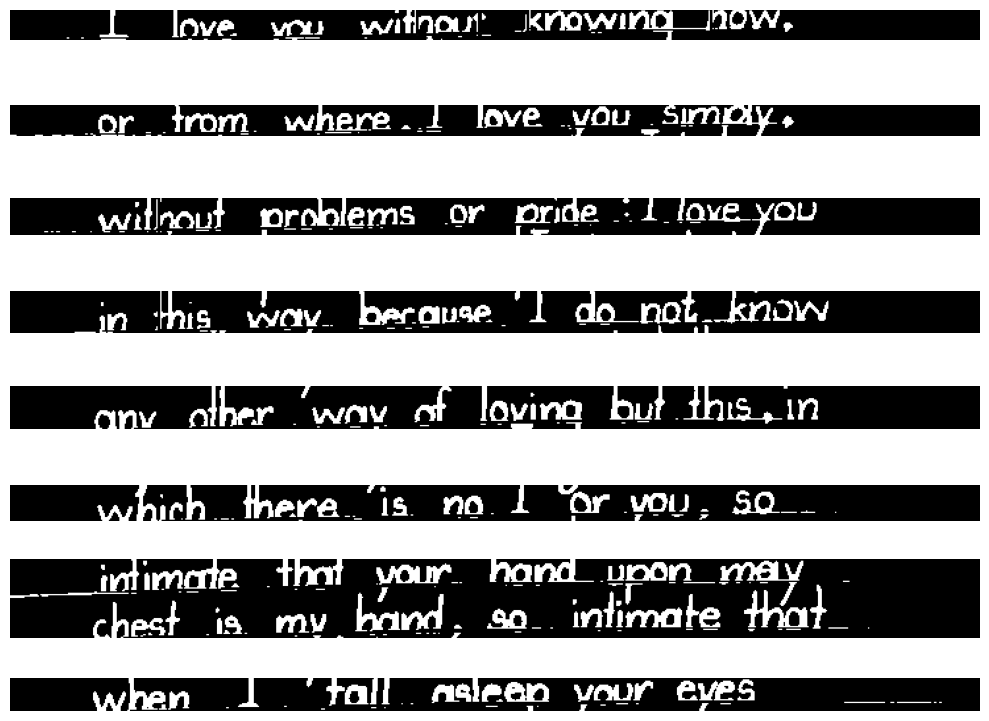

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def remove_background_lines_and_sharpen(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)


    _, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
    remove_horizontal = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
    remove_vertical = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)


    lines_removed = cv2.bitwise_and(binary_img, cv2.bitwise_not(remove_horizontal + remove_vertical))

    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_img = cv2.filter2D(lines_removed, -1, sharpen_kernel)

    return sharpened_img

def segment_lines_by_projection(processed_img, save_folder="segmented_lines"):

    os.makedirs(save_folder, exist_ok=True)


    horizontal_projection = np.sum(processed_img, axis=1)


    threshold = 0.1 * np.max(horizontal_projection)

    line_start = None
    segmented_lines = []
    for i in range(len(horizontal_projection)):
        if horizontal_projection[i] > threshold and line_start is None:
            line_start = i
        elif horizontal_projection[i] <= threshold and line_start is not None:
            if i - line_start > 15:
                segmented_lines.append((line_start, i))
            line_start = None


    for idx, (start, end) in enumerate(segmented_lines):
        line_img = processed_img[start:end, :]  # Crop the line from the processed image
        line_image_path = os.path.join(save_folder, f"line_{idx + 1}.png")
        cv2.imwrite(line_image_path, line_img)
        print(f"Saved: {line_image_path}")


    plt.figure(figsize=(10, len(segmented_lines)))
    for i, (start, end) in enumerate(segmented_lines):
        plt.subplot(len(segmented_lines), 1, i+1)
        plt.imshow(processed_img[start:end, :], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'  # Replace with your image path
save_folder = '/content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines'  # Define the save path
processed_img = remove_background_lines_and_sharpen(image_path)
segment_lines_by_projection(processed_img, save_folder)

Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_1.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_2.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_3.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_4.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_5.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_6.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_7.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_8.png
Segmenting letters in line 1
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteSaved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_6.png


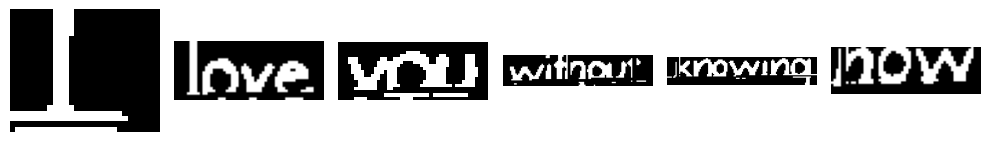

Segmenting letters in line 2
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_6.png


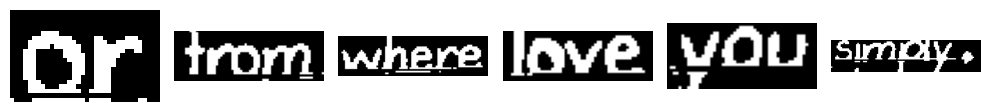

Segmenting letters in line 3
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_5.png


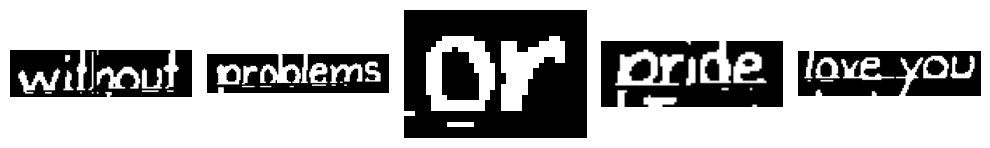

Segmenting letters in line 4
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_6.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_7.png


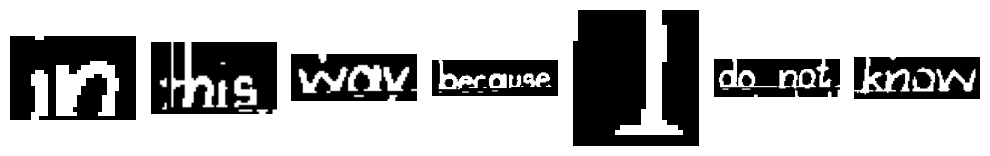

Segmenting letters in line 5
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_6.png


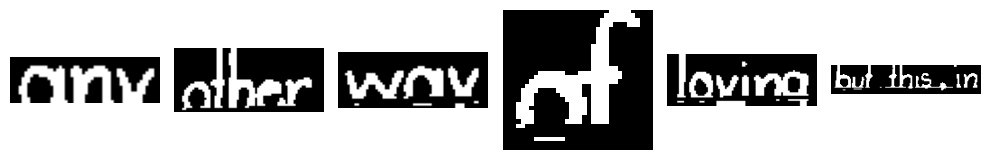

Segmenting letters in line 6
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_6.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_7.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_8.png


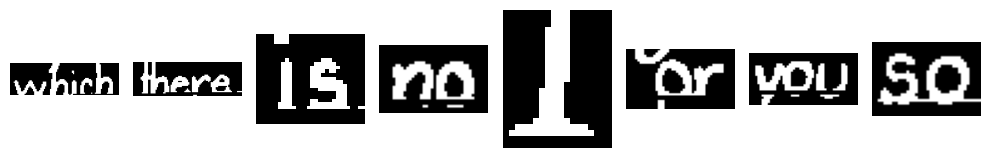

Segmenting letters in line 7
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_6.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_7.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_8.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_9.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/lett

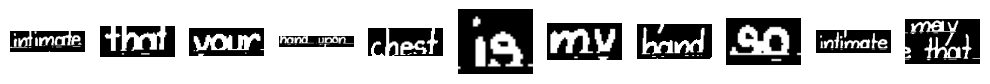

Segmenting letters in line 8
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_6.png


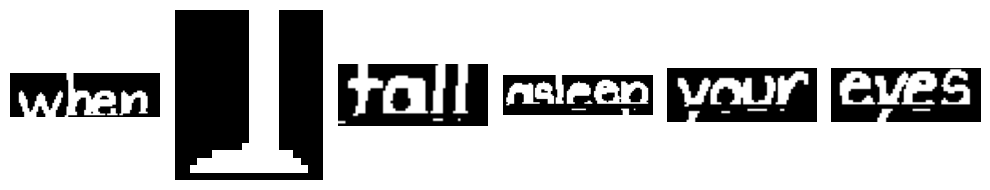

In [ ]:
!pip install easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import easyocr

def remove_background_lines_and_sharpen(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    _, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
    remove_horizontal = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
    remove_vertical = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    lines_removed = cv2.bitwise_and(binary_img, cv2.bitwise_not(remove_horizontal + remove_vertical))
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_img = cv2.filter2D(lines_removed, -1, sharpen_kernel)

    return sharpened_img

def segment_lines_by_projection(processed_img, save_folder="segmented_lines"):
    os.makedirs(save_folder, exist_ok=True)
    horizontal_projection = np.sum(processed_img, axis=1)
    threshold = 0.1 * np.max(horizontal_projection)

    line_start = None
    segmented_lines = []
    for i in range(len(horizontal_projection)):
        if horizontal_projection[i] > threshold and line_start is None:
            line_start = i
        elif horizontal_projection[i] <= threshold and line_start is not None:
            if i - line_start > 15:
                segmented_lines.append((line_start, i))
            line_start = None
    for idx, (start, end) in enumerate(segmented_lines):
        line_img = processed_img[start:end, :]
        line_image_path = os.path.join(save_folder, f"line_{idx + 1}.png")
        cv2.imwrite(line_image_path, line_img)
        print(f"Saved: {line_image_path}")

    return segmented_lines, processed_img

def segment_letters_with_easyocr(line_img, line_idx, save_folder="segmented_letters"):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(line_img, detail=1)
    line_save_folder = os.path.join(save_folder, f"line_{line_idx + 1}")
    os.makedirs(line_save_folder, exist_ok=True)
    for idx, (bbox, text, _) in enumerate(results):
        (top_left, top_right, bottom_right, bottom_left) = bbox
        x_min = int(min(top_left[0], bottom_left[0]))
        y_min = int(min(top_left[1], top_right[1]))
        x_max = int(max(bottom_right[0], top_right[0]))
        y_max = int(max(bottom_right[1], bottom_left[1]))
        letter_img = line_img[y_min:y_max, x_min:x_max]
        letter_image_path = os.path.join(line_save_folder, f"letter_{idx + 1}.png")
        cv2.imwrite(letter_image_path, letter_img)
        print(f"Saved letter: {letter_image_path}")
    plt.figure(figsize=(10, 2))
    for idx, (bbox, text, _) in enumerate(results):
        x_min = int(min(bbox[0][0], bbox[3][0]))
        y_min = int(min(bbox[0][1], bbox[1][1]))
        x_max = int(max(bbox[2][0], bbox[1][0]))
        y_max = int(max(bbox[2][1], bbox[3][1]))
        letter_img = line_img[y_min:y_max, x_min:x_max]

        plt.subplot(1, len(results), idx + 1)
        plt.imshow(letter_img, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'
save_folder_lines = '/content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines'
save_folder_letters = '/content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters'
processed_img = remove_background_lines_and_sharpen(image_path)
segmented_lines, processed_img = segment_lines_by_projection(processed_img, save_folder_lines)
for line_idx, (start, end) in enumerate(segmented_lines):
    line_img = processed_img[start:end, :]
    print(f"Segmenting letters in line {line_idx + 1}")
    segment_letters_with_easyocr(line_img, line_idx, save_folder_letters)

Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_1.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_2.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_3.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_4.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_5.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_6.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_7.png
Saved: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines/line_8.png
Segmenting letters in line 1
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_1/letter_3.png
Saved letter: /content/drive/MyDrive/

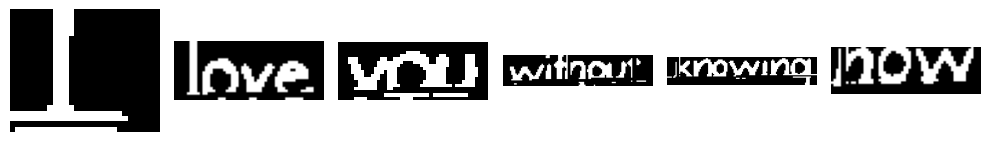

Segmenting letters in line 2
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_2/letter_6.png


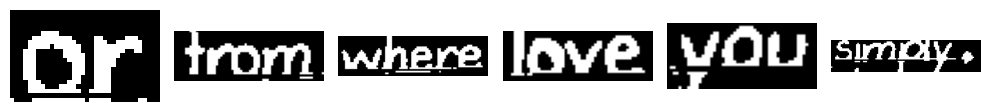

Segmenting letters in line 3
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_3/letter_5.png


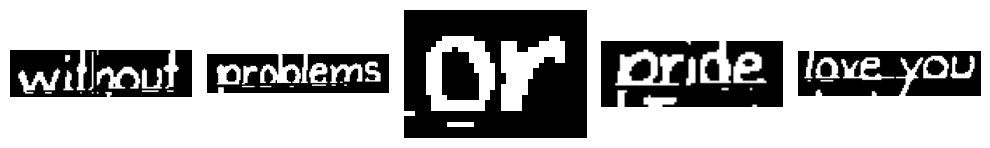

Segmenting letters in line 4
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_6.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_4/letter_7.png


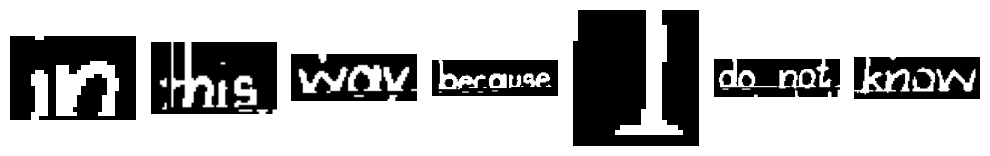

Segmenting letters in line 5
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_5/letter_6.png


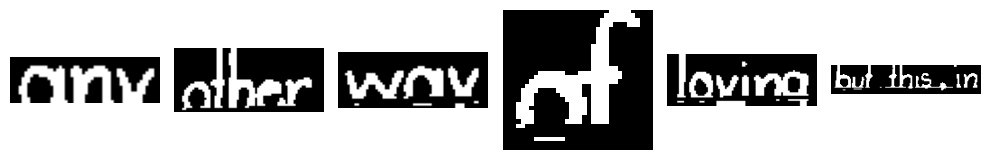

Segmenting letters in line 6
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_6.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_7.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_6/letter_8.png


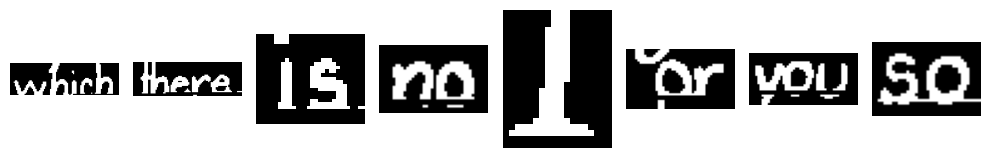

Segmenting letters in line 7
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_6.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_7.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_8.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/letter_9.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_7/lett

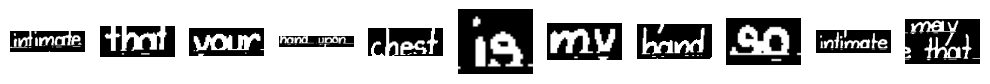

Segmenting letters in line 8
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_1.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_2.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_3.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_4.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_5.png
Saved letter: /content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters/line_8/letter_6.png


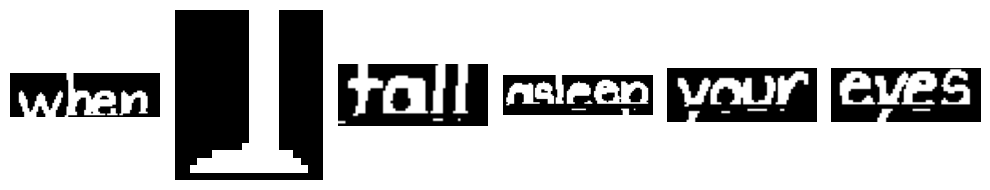

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import easyocr

def remove_background_lines_and_sharpen(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    _, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
    remove_horizontal = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
    remove_vertical = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    lines_removed = cv2.bitwise_and(binary_img, cv2.bitwise_not(remove_horizontal + remove_vertical))
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_img = cv2.filter2D(lines_removed, -1, sharpen_kernel)

    return sharpened_img

def segment_lines_by_projection(processed_img, save_folder="segmented_lines"):
    os.makedirs(save_folder, exist_ok=True)
    horizontal_projection = np.sum(processed_img, axis=1)
    threshold = 0.1 * np.max(horizontal_projection)

    line_start = None
    segmented_lines = []
    for i in range(len(horizontal_projection)):
        if horizontal_projection[i] > threshold and line_start is None:
            line_start = i
        elif horizontal_projection[i] <= threshold and line_start is not None:
            if i - line_start > 15:
                segmented_lines.append((line_start, i))
            line_start = None
    for idx, (start, end) in enumerate(segmented_lines):
        line_img = processed_img[start:end, :]
        line_image_path = os.path.join(save_folder, f"line_{idx + 1}.png")
        cv2.imwrite(line_image_path, line_img)
        print(f"Saved: {line_image_path}")

    return segmented_lines, processed_img

def segment_letters_with_easyocr(line_img, line_idx, save_folder="segmented_letters"):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(line_img, detail=1)

    line_save_folder = os.path.join(save_folder, f"line_{line_idx + 1}")
    os.makedirs(line_save_folder, exist_ok=True)
    for idx, (bbox, text, _) in enumerate(results):
        (top_left, top_right, bottom_right, bottom_left) = bbox
        x_min = int(min(top_left[0], bottom_left[0]))
        y_min = int(min(top_left[1], top_right[1]))
        x_max = int(max(bottom_right[0], top_right[0]))
        y_max = int(max(bottom_right[1], bottom_left[1]))
        letter_img = line_img[y_min:y_max, x_min:x_max]
        letter_image_path = os.path.join(line_save_folder, f"letter_{idx + 1}.png")
        cv2.imwrite(letter_image_path, letter_img)
        print(f"Saved letter: {letter_image_path}")
    plt.figure(figsize=(10, 2))
    for idx, (bbox, text, _) in enumerate(results):
        x_min = int(min(bbox[0][0], bbox[3][0]))
        y_min = int(min(bbox[0][1], bbox[1][1]))
        x_max = int(max(bbox[2][0], bbox[1][0]))
        y_max = int(max(bbox[2][1], bbox[3][1]))
        letter_img = line_img[y_min:y_max, x_min:x_max]

        plt.subplot(1, len(results), idx + 1)
        plt.imshow(letter_img, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'
save_folder_lines = '/content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_lines'
save_folder_letters = '/content/drive/MyDrive/Ayaz-Line_Segmentation/segmented_letters'
processed_img = remove_background_lines_and_sharpen(image_path)
segmented_lines, processed_img = segment_lines_by_projection(processed_img, save_folder_lines)
for line_idx, (start, end) in enumerate(segmented_lines):
    line_img = processed_img[start:end, :]
    print(f"Segmenting letters in line {line_idx + 1}")
    segment_letters_with_easyocr(line_img, line_idx, save_folder_letters)

Segmented 19 letters from the image.

Stroke Analysis Summary:

Letter: H
  Aspect Ratio: 0.59
  Black-White Ratio: 2.72
  Stroke Thickness: 18.00
  Slant Angle: 0.00


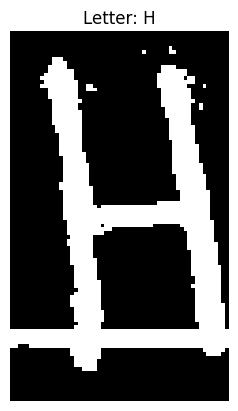


Letter: E
  Aspect Ratio: 0.60
  Black-White Ratio: 3.71
  Stroke Thickness: 15.74
  Slant Angle: 0.00


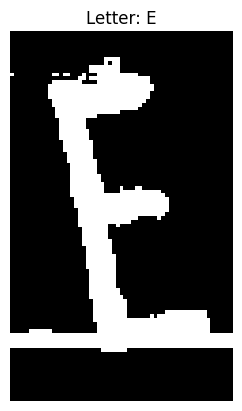


Letter: L
  Aspect Ratio: 0.60
  Black-White Ratio: 4.63
  Stroke Thickness: 13.88
  Slant Angle: 0.00


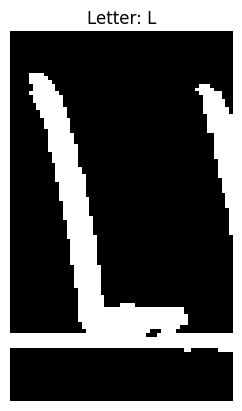


Letter: L
  Aspect Ratio: 0.60
  Black-White Ratio: 4.63
  Stroke Thickness: 13.88
  Slant Angle: 0.00


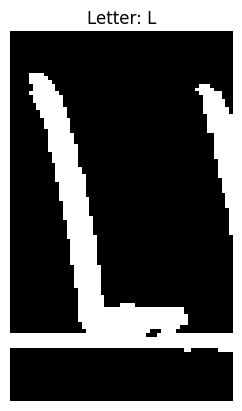


Letter: O
  Aspect Ratio: 0.60
  Black-White Ratio: 5.31
  Stroke Thickness: 14.11
  Slant Angle: 0.00


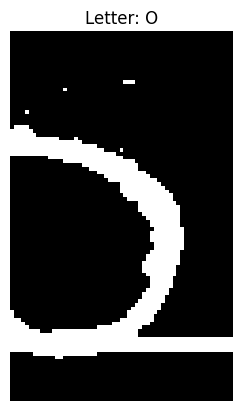


Letter: E
  Aspect Ratio: 0.51
  Black-White Ratio: 3.80
  Stroke Thickness: 14.23
  Slant Angle: 0.00


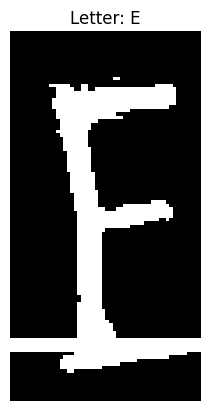


Letter: V
  Aspect Ratio: 0.51
  Black-White Ratio: 3.80
  Stroke Thickness: 14.41
  Slant Angle: 160.00


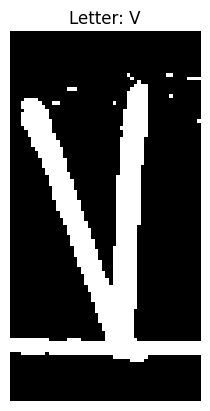


Letter: E
  Aspect Ratio: 0.51
  Black-White Ratio: 3.80
  Stroke Thickness: 14.23
  Slant Angle: 0.00


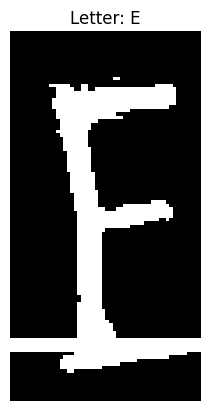


Letter: R
  Aspect Ratio: 0.51
  Black-White Ratio: 3.35
  Stroke Thickness: 17.85
  Slant Angle: 90.00


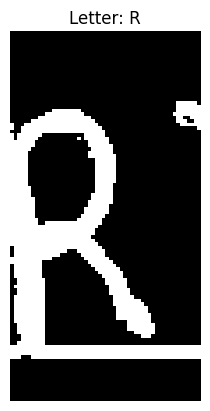


Letter: Y
  Aspect Ratio: 0.51
  Black-White Ratio: 3.80
  Stroke Thickness: 15.55
  Slant Angle: 90.00


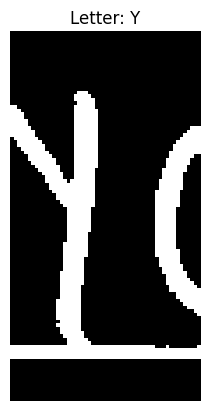


Letter: O
  Aspect Ratio: 0.51
  Black-White Ratio: 4.50
  Stroke Thickness: 15.85
  Slant Angle: 90.00


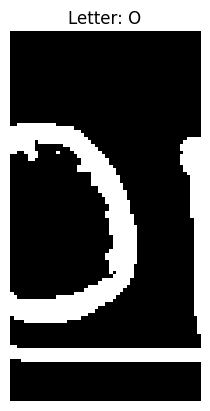


Letter: N
  Aspect Ratio: 0.51
  Black-White Ratio: 4.29
  Stroke Thickness: 14.49
  Slant Angle: 90.00


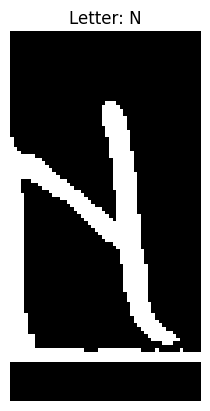


Letter: E
  Aspect Ratio: 0.51
  Black-White Ratio: 3.80
  Stroke Thickness: 14.23
  Slant Angle: 0.00


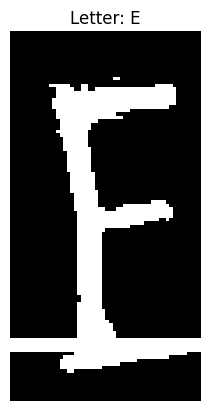


Letter: I
  Aspect Ratio: 0.78
  Black-White Ratio: 3.32
  Stroke Thickness: 18.79
  Slant Angle: 90.00


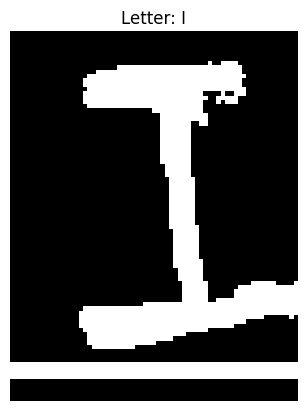


Letter: A
  Aspect Ratio: 0.78
  Black-White Ratio: 12.78
  Stroke Thickness: 6.97
  Slant Angle: 90.00


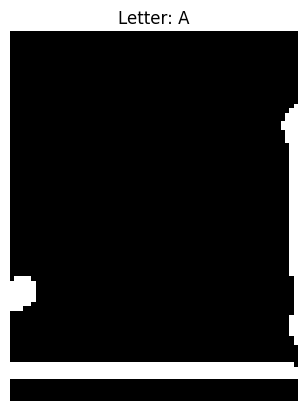


Letter: L
  Aspect Ratio: 0.78
  Black-White Ratio: 2.36
  Stroke Thickness: 25.19
  Slant Angle: 90.00


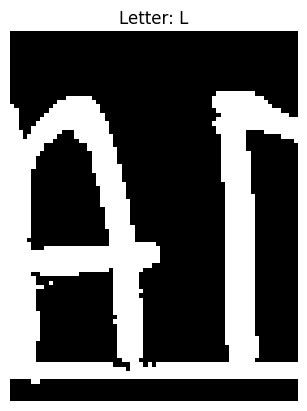


Letter: L
  Aspect Ratio: 0.78
  Black-White Ratio: 2.36
  Stroke Thickness: 25.19
  Slant Angle: 90.00


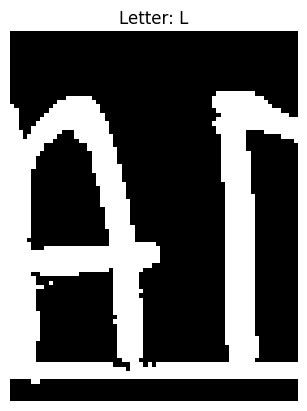


Letter: Y
  Aspect Ratio: 0.56
  Black-White Ratio: 4.65
  Stroke Thickness: 11.49
  Slant Angle: 0.00


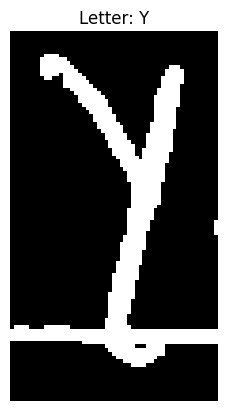


Letter: H
  Aspect Ratio: 0.57
  Black-White Ratio: 4.52
  Stroke Thickness: 14.01
  Slant Angle: 90.00


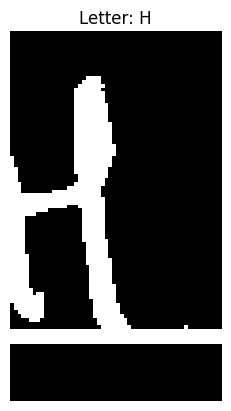

In [ ]:
!pip install easyocr
import cv2
import easyocr
import matplotlib.pyplot as plt
import os
import numpy as np
reader = easyocr.Reader(['en'])

def preprocess_image(image):
    """Prepares the image for analysis: resize, normalize."""
    image_resized = cv2.resize(image, (28, 28))
    if len(image_resized.shape) == 2:
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2BGR)
    image_normalized = image_resized / 255.0
    return image_normalized

def segment_letters_with_easyocr(image_path, output_folder='segmented_letters'):
    """Segments individual letters and prepares them for stroke analysis."""
    image = cv2.imread(image_path)


    results = reader.readtext(image, detail=1, paragraph=False)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    letter_images = []
    features_list = []

    for idx, (bbox, text, prob) in enumerate(results):
        for char in text:
            if char.isupper():
                char_index = text.index(char)
                char_x_min = bbox[0][0] + (char_index * (bbox[1][0] - bbox[0][0]) // len(text))
                char_x_max = bbox[0][0] + ((char_index + 1) * (bbox[1][0] - bbox[0][0]) // len(text))


                x_min, y_min = int(char_x_min), int(bbox[0][1])
                x_max, y_max = int(char_x_max), int(bbox[2][1])


                letter_image = image[y_min:y_max, x_min:x_max]


                letter_image_gray = cv2.cvtColor(letter_image, cv2.COLOR_BGR2GRAY)


                _, letter_image_inverted = cv2.threshold(letter_image_gray, 128, 255, cv2.THRESH_BINARY_INV)

                letter_filename = os.path.join(output_folder, f'letter_{idx}_{char}.png')
                cv2.imwrite(letter_filename, letter_image_inverted)

                letter_images.append((char, letter_image_inverted))

                features = extract_stroke_features(letter_image_inverted)
                features_list.append((char, features))

    print(f"Segmented {len(letter_images)} letters from the image.")
    return letter_images, features_list

def extract_stroke_features(image):
    """Extracts stroke-related features like aspect ratio, slant, and pixel ratio."""

    height, width = image.shape


    aspect_ratio = width / height


    total_pixels = height * width
    white_pixels = np.sum(image == 255)
    black_pixels = total_pixels - white_pixels
    black_white_ratio = black_pixels / white_pixels if white_pixels != 0 else black_pixels

    # Calculate stroke thickness (mean horizontal projection)
    horizontal_projection = np.sum(image, axis=1) / 255
    stroke_thickness = np.mean(horizontal_projection[horizontal_projection > 0])


    edges = cv2.Canny(image, 50, 150)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 50)
    slant_angle = 0
    if lines is not None:
        angles = [np.degrees(line[0][1]) for line in lines]
        slant_angle = np.mean(angles)

    return {
        "Aspect Ratio": aspect_ratio,
        "Black-White Ratio": black_white_ratio,
        "Stroke Thickness": stroke_thickness,
        "Slant Angle": slant_angle
    }

def summarize_stroke_analysis(letter_images, features_list):
    """Displays each letter with its stroke features."""
    print("\nStroke Analysis Summary:")

    for (char, letter_image), (char_feat, features) in zip(letter_images, features_list):
        print(f"\nLetter: {char}")
        for key, value in features.items():
            print(f"  {key}: {value:.2f}")


        plt.imshow(letter_image, cmap='gray')
        plt.title(f'Letter: {char}')
        plt.axis('off')
        plt.show()

image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/image1_page-0001.jpg'

letter_images, features_list = segment_letters_with_easyocr(image_path)

summarize_stroke_analysis(letter_images, features_list)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Segmented 21 letters from the image.

Final Predictions Summary:


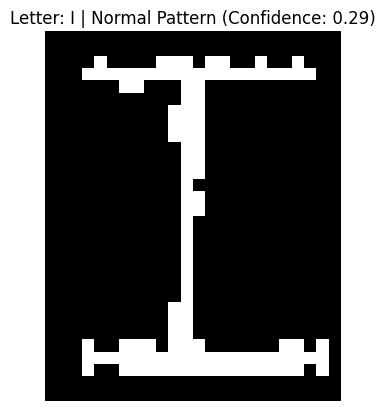

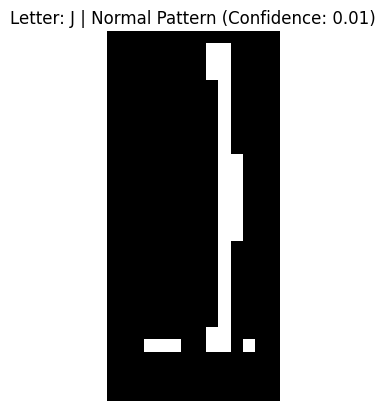

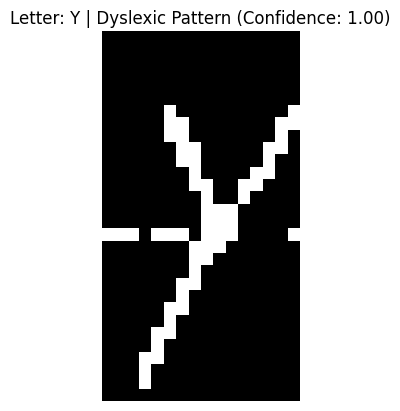

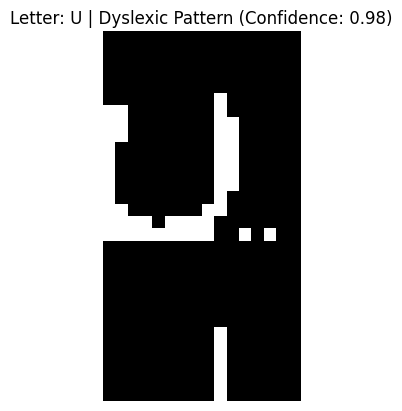

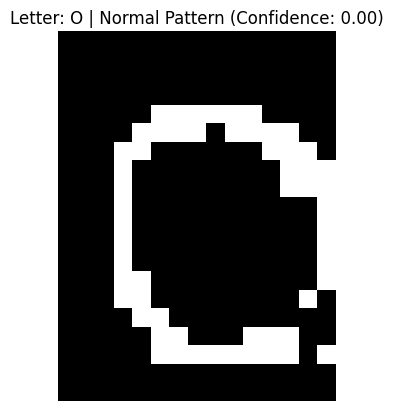

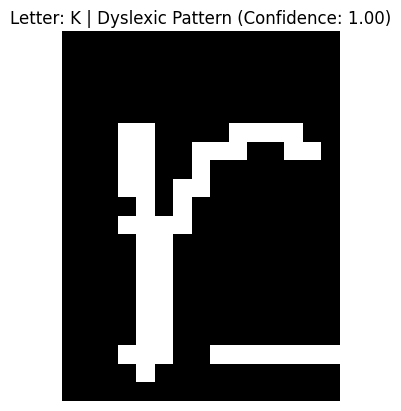

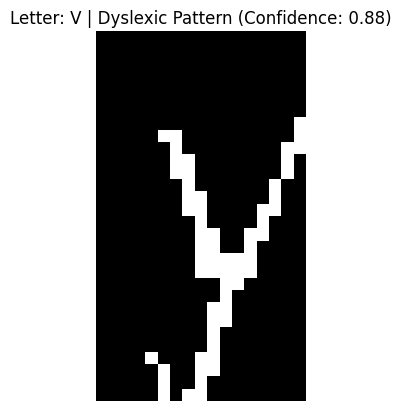

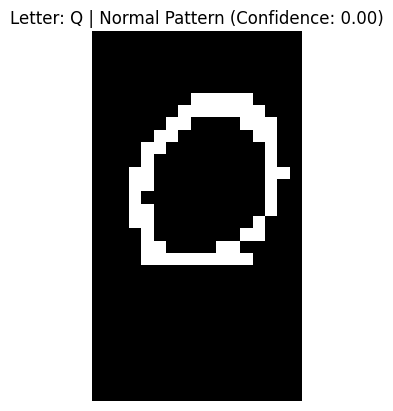

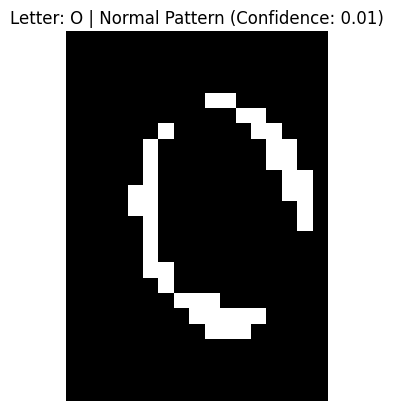

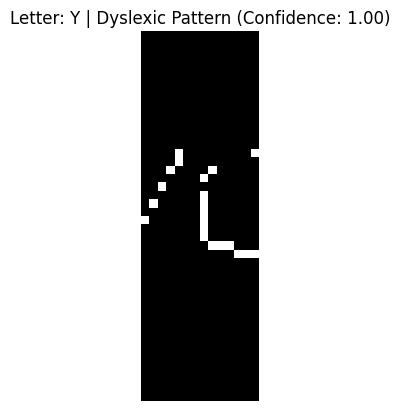

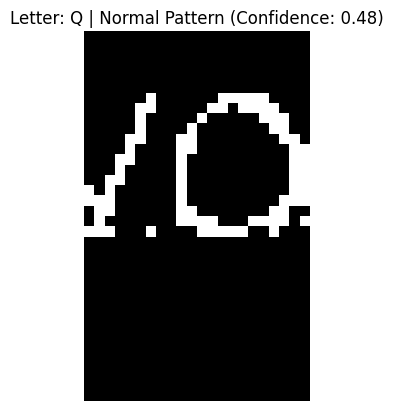

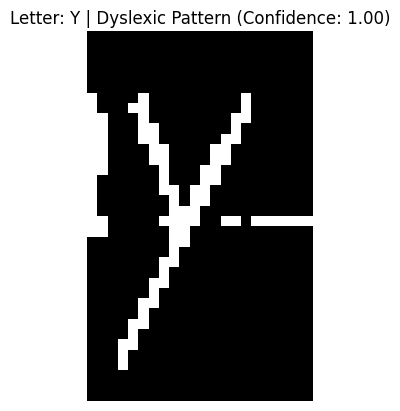

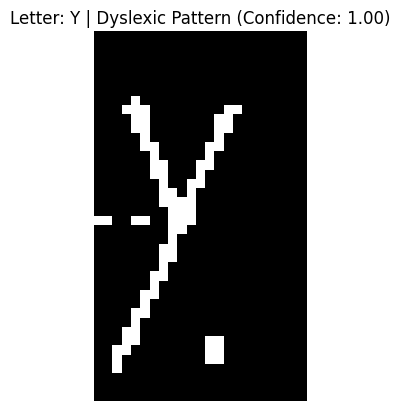

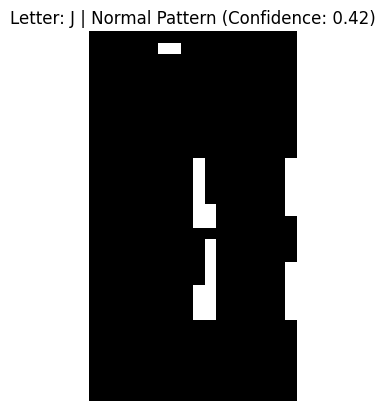

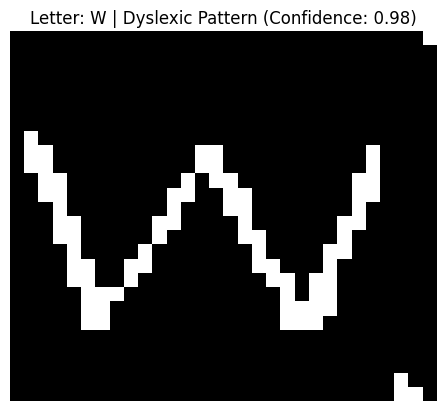

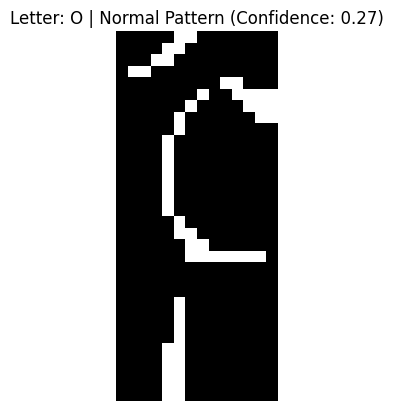

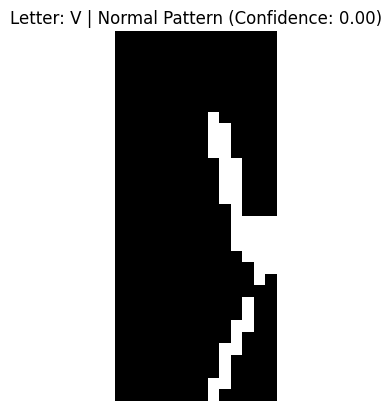

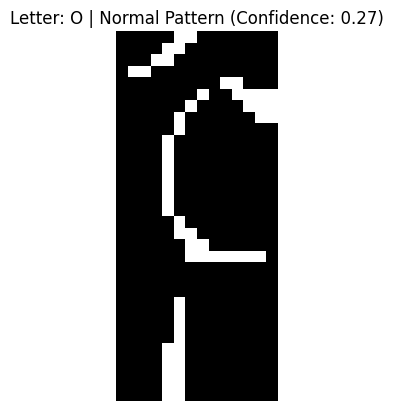

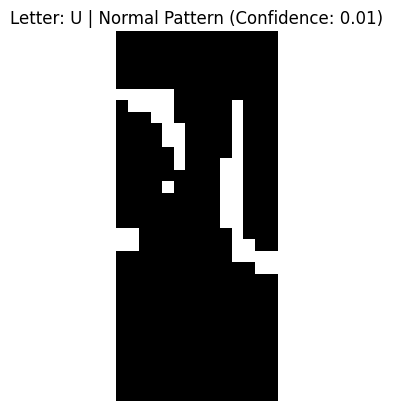

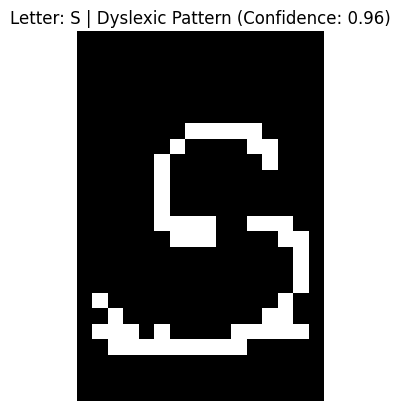

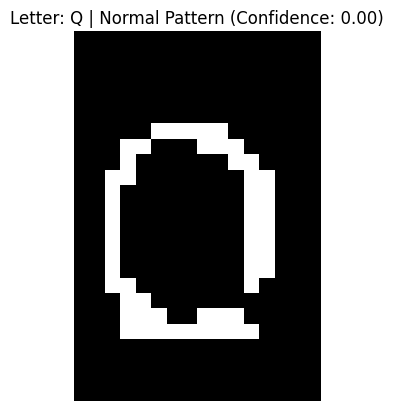


Grouped Results:
Normal: ['I', 'J', 'O', 'Q', 'O', 'O', 'V', 'O', 'U', 'Q']
Corrected: ['Q', 'J']
Reversal: ['Y', 'U', 'K', 'V', 'Y', 'Y', 'Y', 'W', 'S']

Overall: The handwriting shows dyslexic tendencies.


In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import drive


drive.mount('/content/drive')


reader = easyocr.Reader(['en'])


model_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/best_dyslexia_handwriting_model.keras'


if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}. Please check the path.")


model = load_model(model_path)

def preprocess_image(image):
    """Prepares the image for model prediction (resize, normalize)."""
    image_resized = cv2.resize(image, (28, 28))
    if len(image_resized.shape) == 2:
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2BGR)
    image_normalized = image_resized / 255.0
    return np.expand_dims(image_normalized, axis=0)  # Reshape to (1, 28, 28, 3)

def segment_letters_with_easyocr(image_path, output_folder='segmented_letters'):
    """Segments individual letters and returns them along with predictions."""
    # Read the image using OpenCV
    image = cv2.imread(image_path)


    results = reader.readtext(image, detail=1, paragraph=False)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    letter_images = []
    predictions = []

    for idx, (bbox, text, prob) in enumerate(results):
        for char in text:
            if char.isupper():  # Only process uppercase characters

                char_index = text.index(char)
                char_x_min = bbox[0][0] + (char_index * (bbox[1][0] - bbox[0][0]) // len(text))
                char_x_max = bbox[0][0] + ((char_index + 1) * (bbox[1][0] - bbox[0][0]) // len(text))


                x_min, y_min = int(char_x_min), int(bbox[0][1])
                x_max, y_max = int(char_x_max), int(bbox[2][1])


                letter_image = image[y_min:y_max, x_min:x_max]


                letter_image_gray = cv2.cvtColor(letter_image, cv2.COLOR_BGR2GRAY)


                _, letter_image_inverted = cv2.threshold(letter_image_gray, 128, 255, cv2.THRESH_BINARY_INV)


                letter_filename = os.path.join(output_folder, f'letter_{idx}_{char}.png')
                cv2.imwrite(letter_filename, letter_image_inverted)


                letter_images.append((char, letter_image_inverted))


                processed_image = preprocess_image(letter_image_inverted)
                prediction = model.predict(processed_image)


                predictions.append((char, prediction[0][0]))

    print(f"Segmented {len(letter_images)} letters from the image.")
    return letter_images, predictions

def categorize_predictions(predictions):
    """Categorize letters based on the prediction probability."""
    normal, corrected, reversal = [], [], []

    for char, prob in predictions:
        if prob < 0.3:
            normal.append(char)
        elif 0.3 <= prob < 0.7:
            corrected.append(char)
        else:
            reversal.append(char)

    return normal, corrected, reversal

def summarize_predictions(letter_images, predictions):
    """Displays each letter with prediction and group results."""
    print("\nFinal Predictions Summary:")
    dyslexic_detected = False


    for (char, letter_image), (_, prob) in zip(letter_images, predictions):
        label = "Dyslexic Pattern" if prob > 0.5 else "Normal Pattern"

        plt.imshow(letter_image, cmap='gray')
        plt.title(f'Letter: {char} | {label} (Confidence: {prob:.2f})')
        plt.axis('off')  # Hide axis for better visualization
        plt.show()

        if prob > 0.5:
            dyslexic_detected = True


    normal, corrected, reversal = categorize_predictions(predictions)


    print("\nGrouped Results:")
    print(f"Normal: {normal}")
    print(f"Corrected: {corrected}")
    print(f"Reversal: {reversal}")

    # Final summary of dyslexic tendencies
    if dyslexic_detected:
        print("\nOverall: The handwriting shows dyslexic tendencies.")
    else:
        print("\nOverall: The handwriting appears normal.")


image_path = '/content/drive/MyDrive/Ayaz-Line_Segmentation/testing_image/WhatsApp Image 2024-11-06 at 20.23.19.jpeg'


if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found at {image_path}. Please check the path.")


letter_images, predictions = segment_letters_with_easyocr(image_path)


summarize_predictions(letter_images, predictions)




In [ ]:
model.save("best_dyslexia_handwriting_model.keras")
